<a href="https://colab.research.google.com/github/sugarforever/OpenAI-Tutorials/blob/main/vanna_sqlite_nba_shots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install 'vanna[chromadb,openai]' pandas -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 940.2 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.6/602.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
def import_csv_to_sqlite(csv_path, db_name='nba_shots.db'):
    df = pd.read_csv(csv_path)
    conn = sqlite3.connect(db_name)
    df.to_sql('nba_shots', conn, if_exists='replace', index=False)
    conn.close()

    print(f"Data imported successfully to {db_name}")

In [ ]:
import_csv_to_sqlite('NBA_2024_Shots.csv')

Data imported successfully to nba_shots.db


In [ ]:
from vanna.openai import OpenAI_Chat
from vanna.chromadb import ChromaDB_VectorStore

In [ ]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

In [ ]:
class MyVanna(ChromaDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        OpenAI_Chat.__init__(self, config=config)

vn = MyVanna(config={'api_key': OPENAI_API_KEY, 'model': 'gpt-4o'})

In [ ]:
vn.connect_to_sqlite('nba_shots.db')

In [ ]:
documentation = '''
SEASON_1 & SEASON_2: Season indicator variables
TEAM_ID: NBA's unique ID variable of that specific team in their API.
PLAYER_ID: NBA's unique ID variable of that specific player in their API.
PLAYER_NAME: Name of the player.
GAME_DATE: Date of the game (M-D-Y // Month-Date-Year).
GAME_ID: NBA's unique ID variable of that specific game in their API.
EVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).
SHOT_MADE: True/False variable denoting a shot outcome (TRUE // FALSE).
ACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).
SHOT_TYPE: Type of shot (2PT or 3PT).
BASIC_ZONE: Name of the court zone the shot took place in.
Restricted Area, In the Paint (non-RA), Midrange, Left Corner 3, Right Corner 3, Above the Break, Backcourt.
ZONE_NAME: Name of the side of court the shot took place in.
left, left side center, center, right side center, right
ZONE_ABB: Abbreviation of the side of court.
(L), (LC), (C), (RC), (R).
ZONE_RANGE: Distance range of shot by zones.
Less than 8 ft., 8-16 ft. 16-24 ft. 24+ ft.
LOC_X: X coordinate of the shot in the x, y plane of the court (0, 50).
LOC_Y: Y coordinate of the shot in the x, y plane of the court (0, 50).
SHOT_DISTANCE: Distance of the shot with respect to the center of the hoop, in feet.
QUARTER: Quarter of the game.
MINS_LEFT: Minutes remaining in the quarter.
SECS_LEFT: Seconds remaining in minute of the quarter.
'''

In [ ]:
vn.train(documentation=f"Please refer to the following content to understand the meaning of all the columns in the source of truth. {documentation}")

Adding documentation....


'f6aaf873-b43d-5013-b17c-19151c2ee38e-doc'

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the following content to understand the meaning of all the columns in the source of truth. \nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nPLAYER_NAME: Name of the player.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (TRUE // FALSE).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3

LLM Response: SELECT COUNT(*) FROM nba_shots
SELECT COUNT(*) FROM nba_shots
   COUNT(*)
0    218701
Using model gpt-4o for 158.0 tokens (approx)


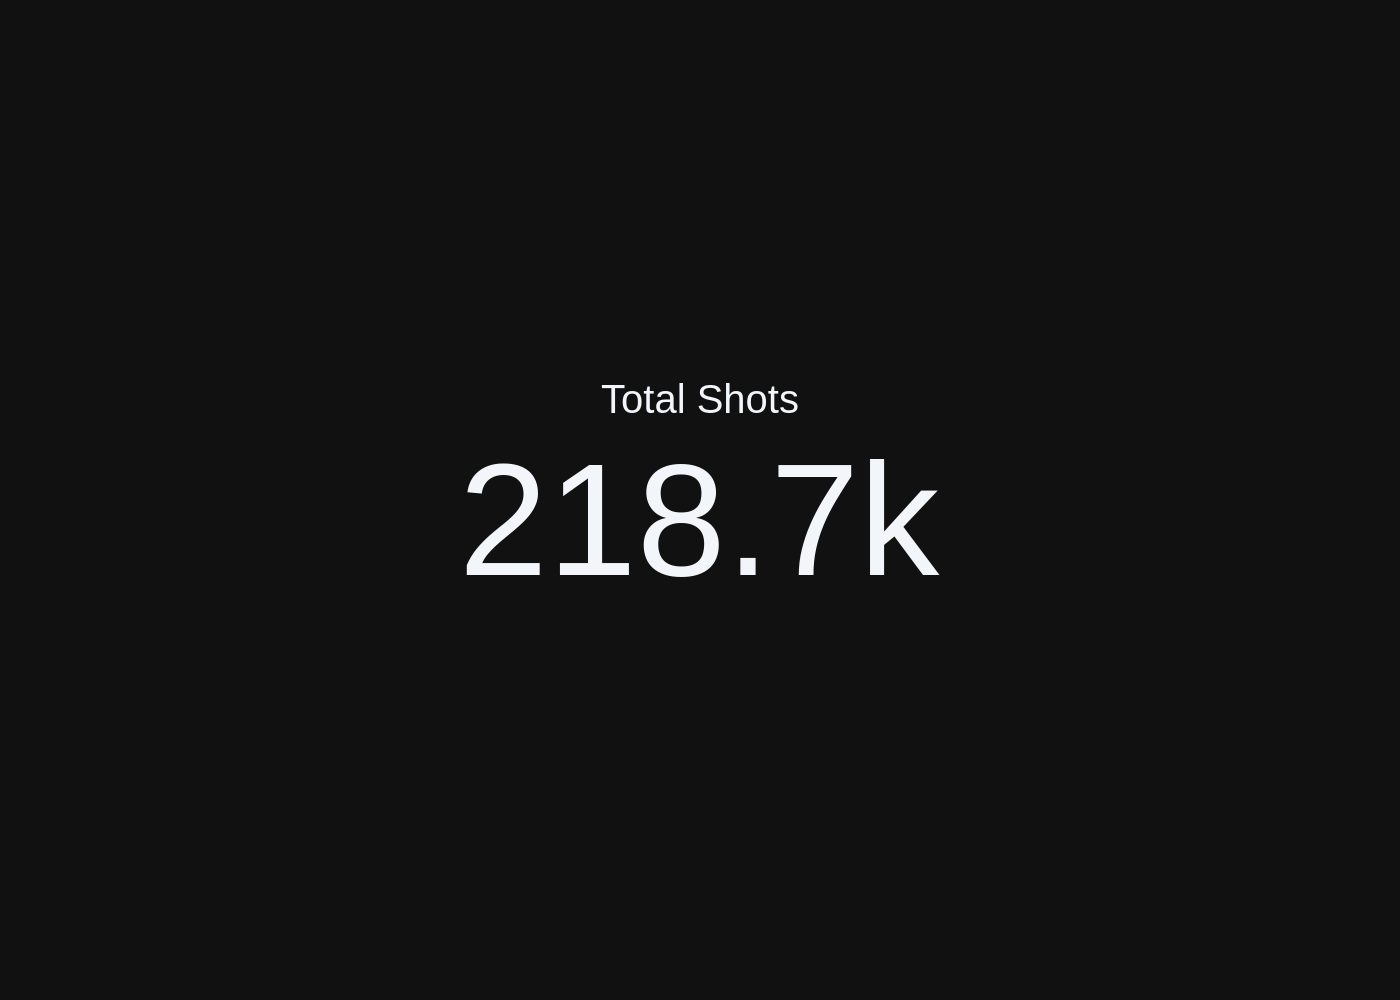

In [ ]:
response = vn.ask("How many shots in total?")

In [ ]:
response

('SELECT COUNT(*) FROM nba_shots',
    COUNT(*)
 0    218701,
 Figure({
     'data': [{'mode': 'number', 'title': {'text': 'Total Shots'}, 'type': 'indicator', 'value': 218701}],
     'layout': {'template': '...'}
 }))

In [ ]:
question = "Who made most shots? Give me the player name"

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the following content to understand the meaning of all the columns in the source of truth. \nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nPLAYER_NAME: Name of the player.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (TRUE // FALSE).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3

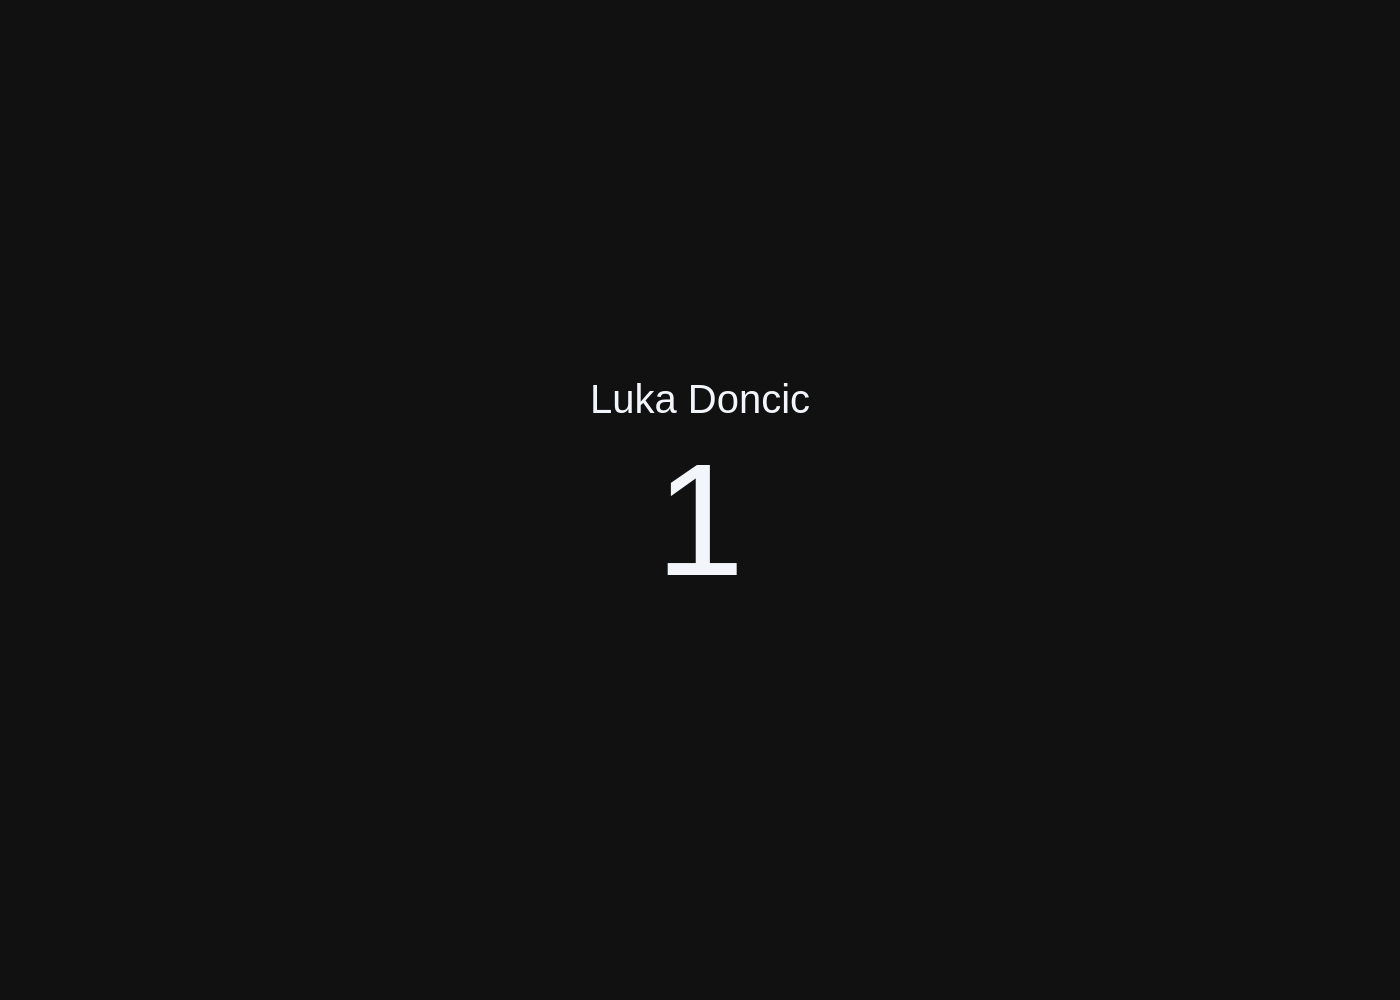

('SELECT PLAYER_NAME \nFROM nba_shots \nGROUP BY PLAYER_NAME \nORDER BY COUNT(*) DESC \nLIMIT 1;',
    PLAYER_NAME
 0  Luka Doncic,
 Figure({
     'data': [{'mode': 'number', 'title': {'text': 'Luka Doncic'}, 'type': 'indicator', 'value': 1}],
     'layout': {'template': '...'}
 }))

In [ ]:
vn.ask(question)

In [ ]:
sql = vn.generate_sql(question)

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the following content to understand the meaning of all the columns in the source of truth. \nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nPLAYER_NAME: Name of the player.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (TRUE // FALSE).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3

In [ ]:
sql

'SELECT PLAYER_NAME \nFROM nba_shots \nGROUP BY PLAYER_NAME \nORDER BY COUNT(*) DESC \nLIMIT 1;'

In [ ]:
result = vn.run_sql(sql)

In [ ]:
result

,PLAYER_NAME
0,Luka Doncic


In [ ]:
code = vn.generate_plotly_code(result)
code

Using model gpt-4o for 126.25 tokens (approx)


'import plotly.graph_objects as go\n\nfig = go.Figure(go.Indicator(\n    mode = "number",\n    value = 1,\n    title = {"text": df[\'PLAYER_NAME\'][0]}\n))\n\n'

In [ ]:
figure = vn.get_plotly_figure(code, result)

In [ ]:
figure

In [ ]:
figure.write_image("plot.png")

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the following content to understand the meaning of all the columns in the source of truth. \nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nPLAYER_NAME: Name of the player.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (TRUE // FALSE).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3

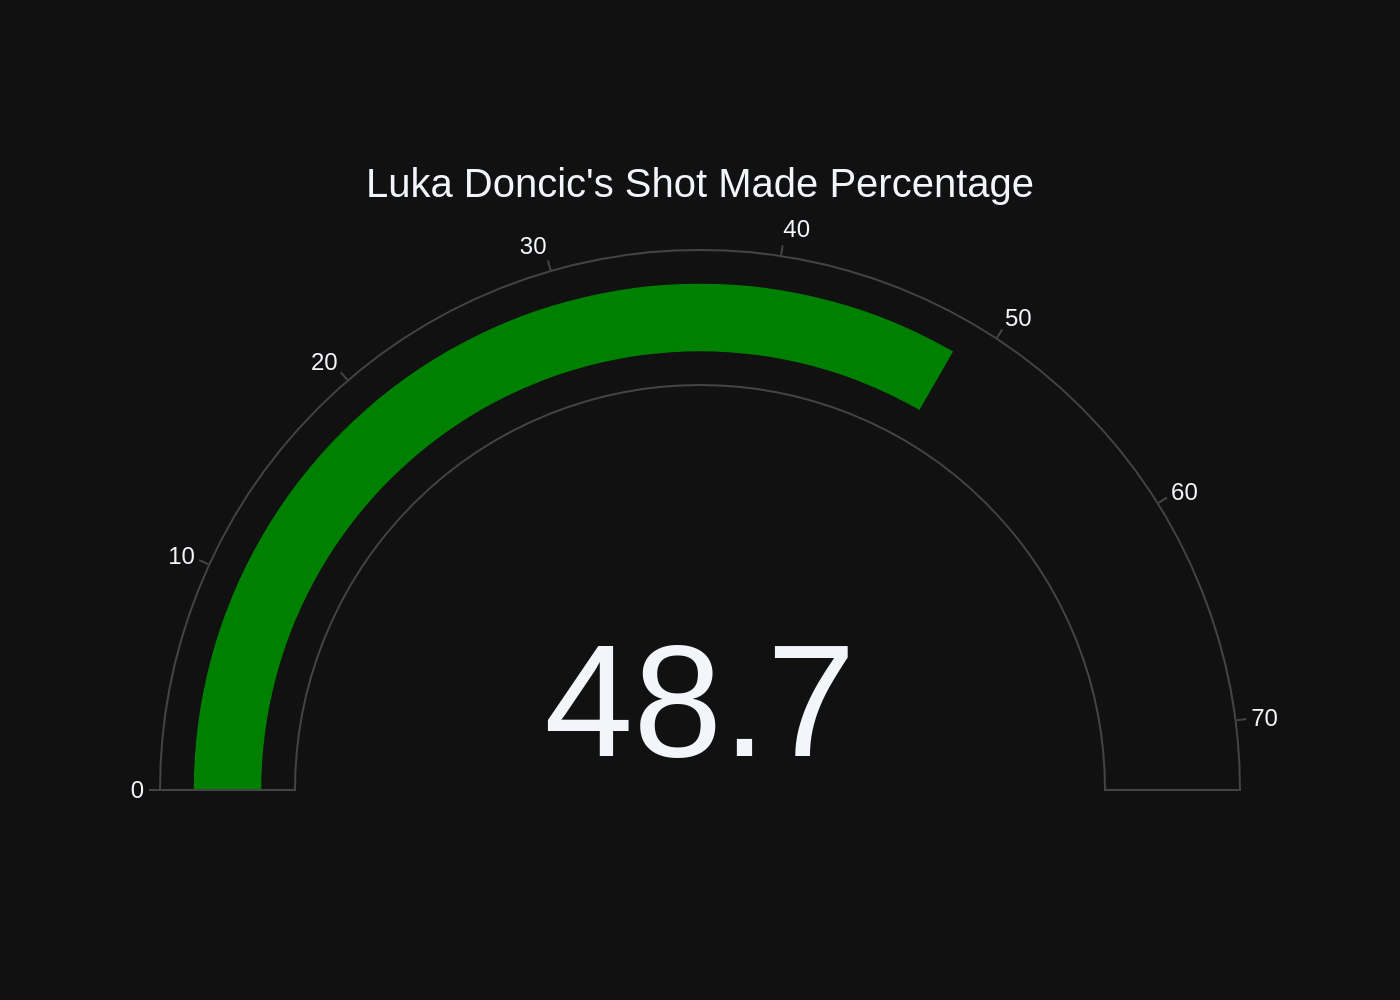

("SELECT \n    (SUM(SHOT_MADE) * 100.0 / COUNT(*)) AS shot_made_percentage\nFROM nba_shots\nWHERE PLAYER_NAME = 'Luka Doncic';",
    shot_made_percentage
 0             48.668281,
 Figure({
     'data': [{'mode': 'gauge+number',
               'title': {'text': "Luka Doncic's Shot Made Percentage"},
               'type': 'indicator',
               'value': 48.6682808716707}],
     'layout': {'template': '...'}
 }))

In [ ]:
vn.ask("Show me Luka Doncic's shot made percentage. Note that 1 means shot made, 0 shot miss")

In [ ]:
question = "Plot the shooting percentages of the top 3 players with the highest shot made percentage. Note that 1 means shot made, 0 shot miss"

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the following content to understand the meaning of all the columns in the source of truth. \nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nPLAYER_NAME: Name of the player.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (TRUE // FALSE).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3

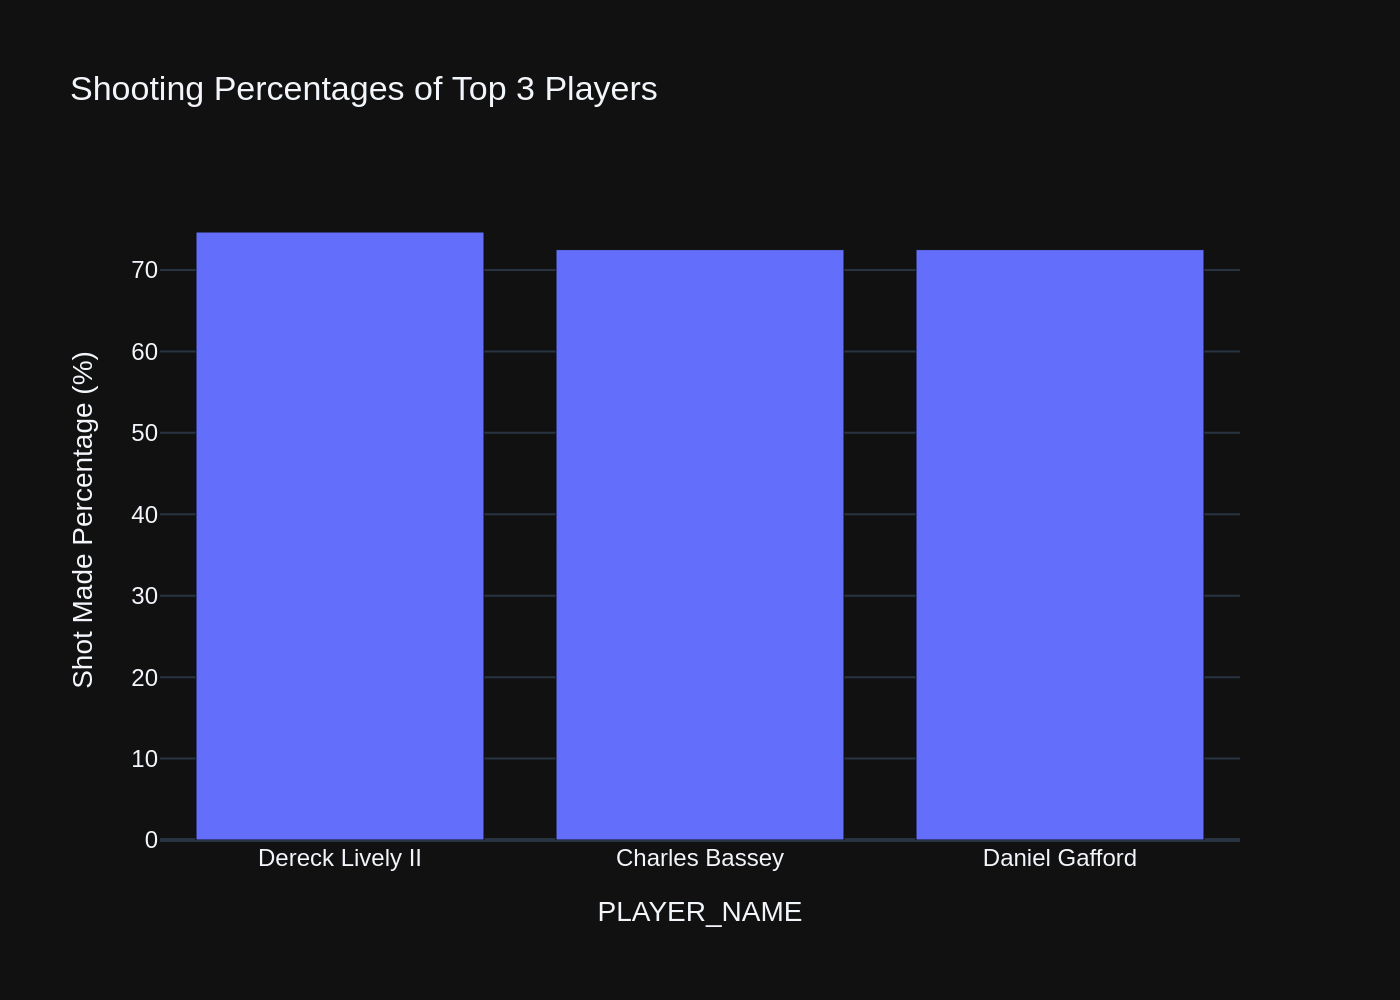

('WITH player_shot_stats AS (\n    SELECT \n        PLAYER_NAME,\n        SUM(SHOT_MADE) * 100.0 / COUNT(*) AS shot_made_percentage\n    FROM nba_shots\n    GROUP BY PLAYER_NAME\n)\nSELECT PLAYER_NAME, shot_made_percentage\nFROM player_shot_stats\nORDER BY shot_made_percentage DESC\nLIMIT 3;',
         PLAYER_NAME  shot_made_percentage
 0  Dereck Lively II             74.662162
 1    Charles Bassey             72.500000
 2    Daniel Gafford             72.500000,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'PLAYER_NAME=%{x}<br>Shot Made Percentage (%)=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['Dereck Lively II', 'Charles Bassey', 'Daniel 

In [ ]:
vn.ask(question)

In [ ]:
documentation = '''
SEASON_1 & SEASON_2: Season indicator variables
TEAM_ID: NBA's unique ID variable of that specific team in their API.
PLAYER_ID: NBA's unique ID variable of that specific player in their API.
PLAYER_NAME: Name of the player.
GAME_DATE: Date of the game (M-D-Y // Month-Date-Year).
GAME_ID: NBA's unique ID variable of that specific game in their API.
EVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).
SHOT_MADE: variable denoting a shot outcome (1 // 0).
ACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).
SHOT_TYPE: Type of shot (2PT or 3PT).
BASIC_ZONE: Name of the court zone the shot took place in.
Restricted Area, In the Paint (non-RA), Midrange, Left Corner 3, Right Corner 3, Above the Break, Backcourt.
ZONE_NAME: Name of the side of court the shot took place in.
left, left side center, center, right side center, right
ZONE_ABB: Abbreviation of the side of court.
(L), (LC), (C), (RC), (R).
ZONE_RANGE: Distance range of shot by zones.
Less than 8 ft., 8-16 ft. 16-24 ft. 24+ ft.
LOC_X: X coordinate of the shot in the x, y plane of the court (0, 50).
LOC_Y: Y coordinate of the shot in the x, y plane of the court (0, 50).
SHOT_DISTANCE: Distance of the shot with respect to the center of the hoop, in feet.
QUARTER: Quarter of the game.
MINS_LEFT: Minutes remaining in the quarter.
SECS_LEFT: Seconds remaining in minute of the quarter.
'''

In [ ]:
vn.train(documentation=f"Please refer to the following content to understand the meaning of all the columns in the source of truth. {documentation}")

Adding documentation....


'72b4017d-b35e-5e94-9314-56d7670d12ee-doc'

In [ ]:
sql = vn.generate_sql(question)

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the following content to understand the meaning of all the columns in the source of truth. \nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nPLAYER_NAME: Name of the player.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: variable denoting a shot outcome (1 // 0).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3PT).\nBASIC_ZONE: 

In [ ]:
result = vn.run_sql(sql)

In [ ]:
print(type(result))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(result)

        PLAYER_NAME  shot_made_percentage
0  Dereck Lively II             74.662162
1    Charles Bassey             72.500000
2    Daniel Gafford             72.500000


In [ ]:
import plotly.express as px

figure = px.bar(result, x='PLAYER_NAME', y='shot_made_percentage', title='Top Shooters')

figure.update_layout(
    xaxis_title="Player Name",
    yaxis_title="Shot Made %",
    bargap=0.2,  # gap between bars
)

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the following content to understand the meaning of all the columns in the source of truth. \nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nPLAYER_NAME: Name of the player.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: variable denoting a shot outcome (1 // 0).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3PT).\nBASIC_ZONE: 

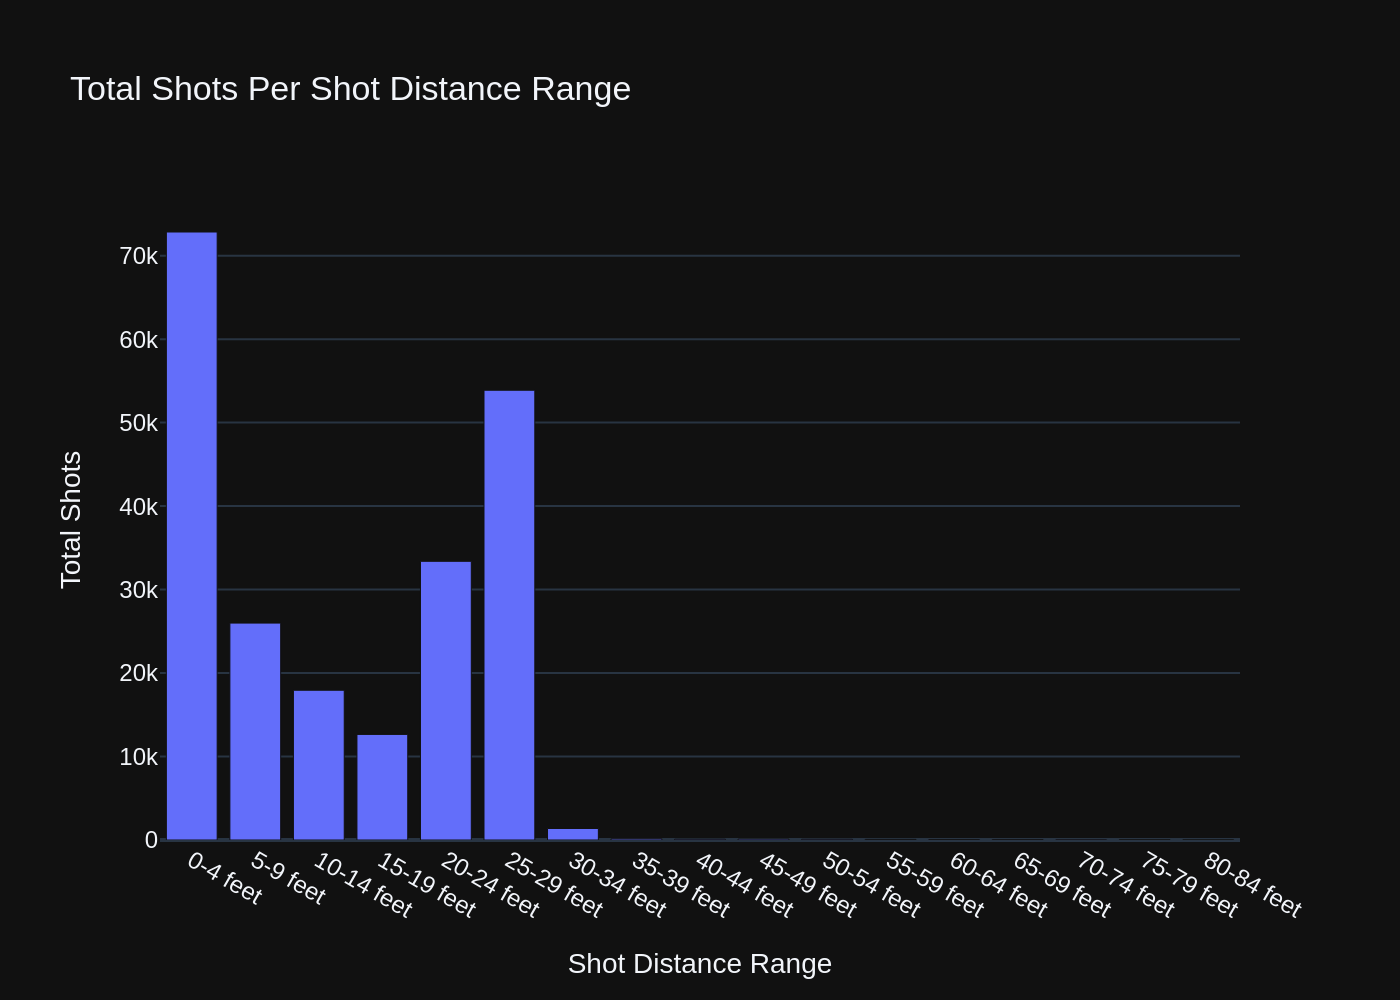

('SELECT \n    (SHOT_DISTANCE / 5) * 5 AS distance_range_start,\n    ((SHOT_DISTANCE / 5) * 5) + 4 AS distance_range_end,\n    COUNT(*) AS total_shots\nFROM nba_shots\nGROUP BY distance_range_start, distance_range_end\nORDER BY distance_range_start;',
     distance_range_start  distance_range_end  total_shots distance_range
 0                      0                   4        72835       0-4 feet
 1                      5                   9        25984       5-9 feet
 2                     10                  14        17941     10-14 feet
 3                     15                  19        12648     15-19 feet
 4                     20                  24        33387     20-24 feet
 5                     25                  29        53878     25-29 feet
 6                     30                  34         1377     30-34 feet
 7                     35                  39          152     35-39 feet
 8                     40                  44          101     40-44 feet
 9      

In [ ]:
vn.ask("Every 5 feet as a range, plot the total shots per shot distance")